<a href="https://colab.research.google.com/github/Ujjwalpaliwal/House_Rate_Prediction/blob/main/Healthcare_cost_Pridection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-06-27 16:16:35--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2025-06-27 16:16:35 (4.25 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
df = dataset.dropna()

import sklearn.preprocessing as skp
le = skp.LabelEncoder()

to_convert = ['sex', 'smoker', 'region']

for col in to_convert:
  df[col] = le.fit_transform(df[col])

y = df['expenses']
x = df.drop('expenses', axis = 1)

import sklearn.model_selection as skm
x_train, x_test, y_train, y_test = skm.train_test_split(x, y, train_size = 0.8)

In [6]:
y_train

,expenses
1237,12224.35
528,8342.91
6,8240.59
497,8027.97
36,15612.19
...,...
456,11881.97
1009,9957.72
1179,19350.37
706,44400.41


In [7]:
model = keras.Sequential([
                             layers.Dense(400, activation = 'relu'),
                             layers.Dense(200, activation = 'relu'),
                             layers.Dropout(0.2),
                             layers.Dense(100, activation = 'relu'),
                             layers.Dense(1, activation = 'linear')

])

model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics = ['mae', 'mse']
)

In [8]:
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 12902.2686 - mae: 12902.2686 - mse: 303776160.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11738.5439 - mae: 11738.5439 - mse: 296679168.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7894.6196 - mae: 7894.6196 - mse: 152173376.0000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8257.3213 - mae: 8257.3213 - mse: 183169440.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7539.4326 - mae: 7539.4326 - mse: 169558192.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7587.2695 - mae: 7587.2695 - mse: 174894000.0000
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6982.1733 - mae: 6982.1733 - mse: 157416512.0000
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7415.2944 - mae: 7415.2944 - mse: 179724448.0000
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6706.3374 - mae: 6706.3374 - mse: 164251696.0000
Epoch 10/100
34/34 ━━━━━

In [9]:
test_dataset = x_test
test_labels = y_test

9/9 - 0s - 37ms/step - loss: 2833.4053 - mae: 2833.4053 - mse: 33437504.0000
Testing set Mean Abs Error: 2833.41 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


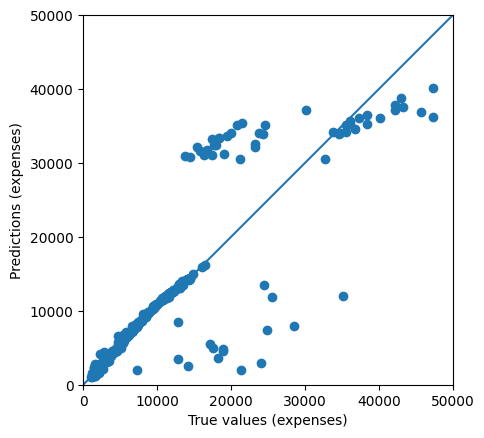

In [10]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
